In [2]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

Dataset Shape: (10, 24)

Missing Values Summary:
 Household_id               0
individual_ID              0
startType                  0
cor_long                   0
cor_lat                    0
adress                     0
firstname                  0
lastname                   0
dob                        0
gender                     0
age_at_death               0
whom                       0
causofdeathnotdiagnosed    0
place_of_death             0
date_of_death              0
meta_instance_id           0
cause_of_death             0
Place_of _death            0
diagnoseddeath             0
causeofdeathdiagnosed      0
weath_sc3                  0
read_write                 0
occup                      0
educ_statu                 1
dtype: int64


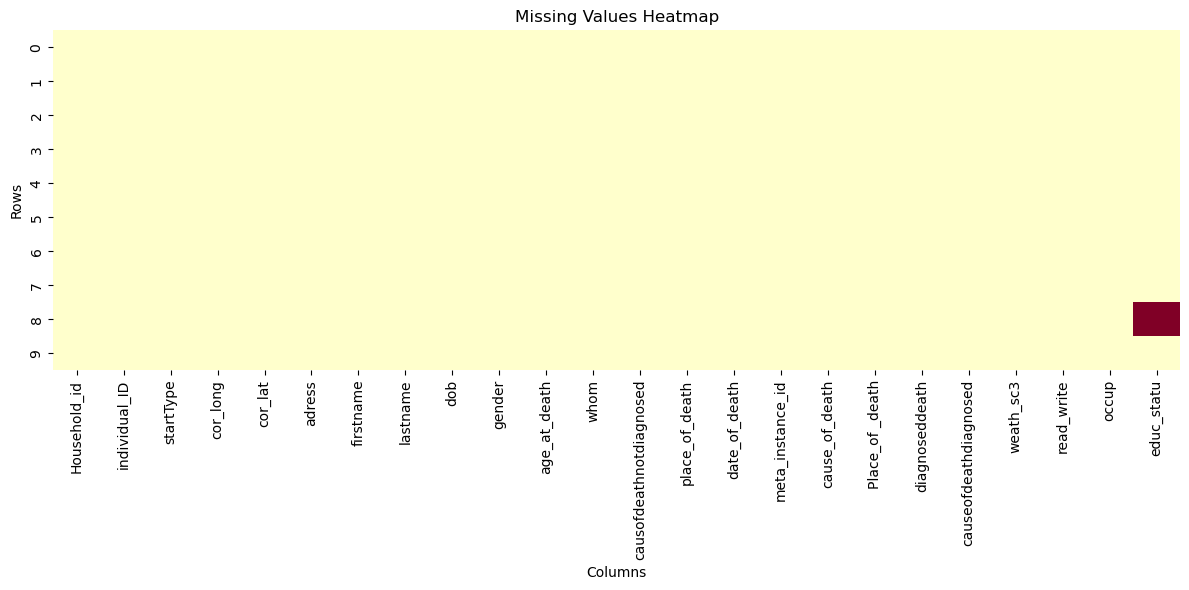

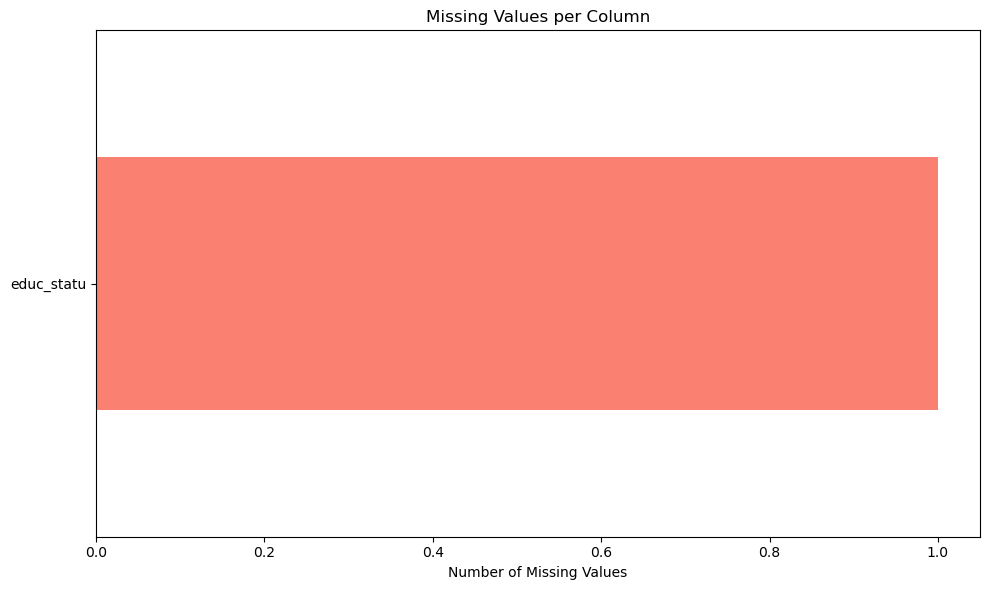

In [16]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load your dataset using the file path
file_path = 'C:/Users/mihre/OneDrive/Documents/Ahri/Hackaton/sample_hackathon.csv'
df = pd.read_csv(file_path)

# Step 3: Display basic info
print("Dataset Shape:", df.shape)
print("\nMissing Values Summary:\n", df.isnull().sum())

# Step 4: Visualize missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

# Step 5: Plot bar chart of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # only columns with missing

plt.figure(figsize=(10, 6))
missing_counts.sort_values().plot(kind='barh', color='salmon')
plt.title("Missing Values per Column")
plt.xlabel("Number of Missing Values")
plt.tight_layout()
plt.show()


🔍 Total Anomalies Detected: 7 out of 10 rows


C:\Users\mihre\AppData\Local\Temp\ipykernel_6220\2920197700.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_anomaly', data=df, palette='coolwarm')


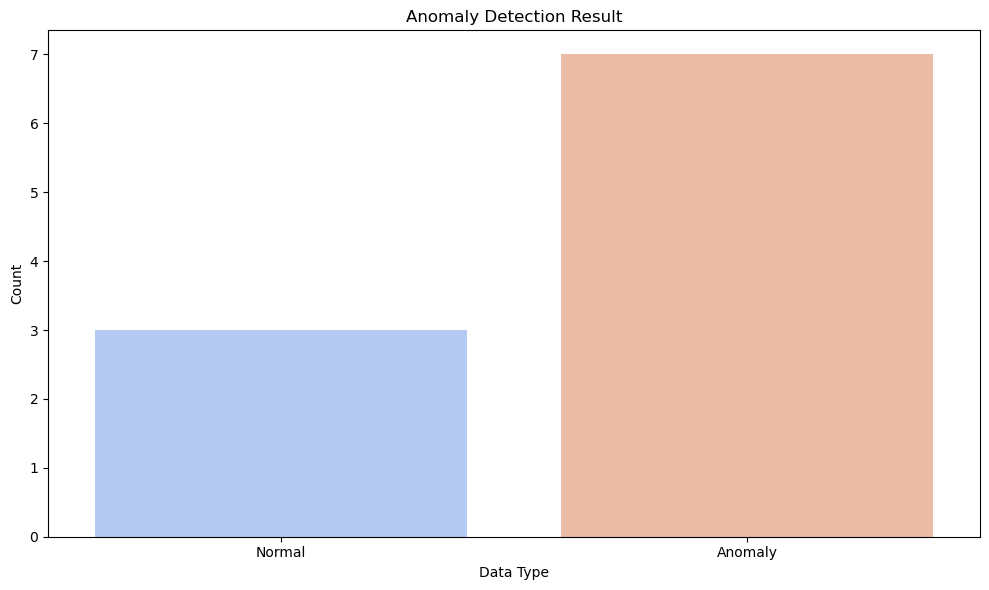

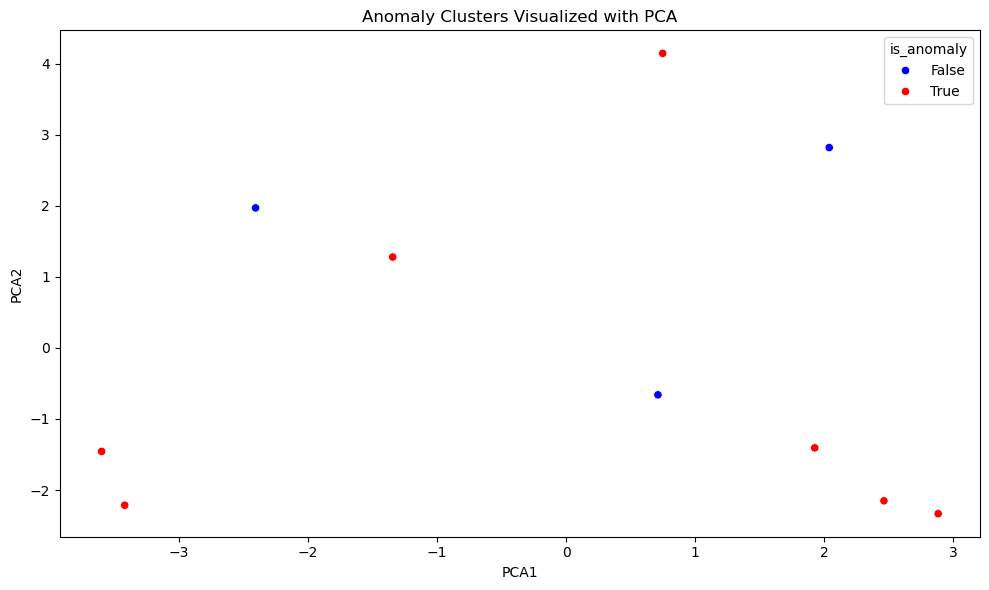

In [17]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Load dataset
file_path = 'C:/Users/mihre/OneDrive/Documents/Ahri/Hackaton/sample_hackathon.csv'
df = pd.read_csv(file_path)

# Step 3: Preprocess: Encode categorical and scale numeric values
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Handle missing values (fill temporarily for model input)
df_encoded.fillna(df_encoded.median(numeric_only=True), inplace=True)

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Step 4: Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
df['anomaly_score'] = model.fit_predict(scaled_data)

# Step 5: Identify anomalies (-1 = anomaly, 1 = normal)
df['is_anomaly'] = df['anomaly_score'] == -1
anomaly_count = df['is_anomaly'].sum()

print(f"🔍 Total Anomalies Detected: {anomaly_count} out of {len(df)} rows")

# Step 6: Visualize anomaly distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_anomaly', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.title("Anomaly Detection Result")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Optional: Visualize anomalies in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='is_anomaly', palette={True: 'red', False: 'blue'})
plt.title("Anomaly Clusters Visualized with PCA")
plt.tight_layout()
plt.show()

# Optional: Save anomalies
df[df['is_anomaly']].to_csv("auto_detected_anomalies.csv", index=False)


In [30]:
pip install pandas numpy matplotlib seaborn scikit-learn


Missing Data Information:
            Missing Values  Percentage
educ_statu               1        10.0


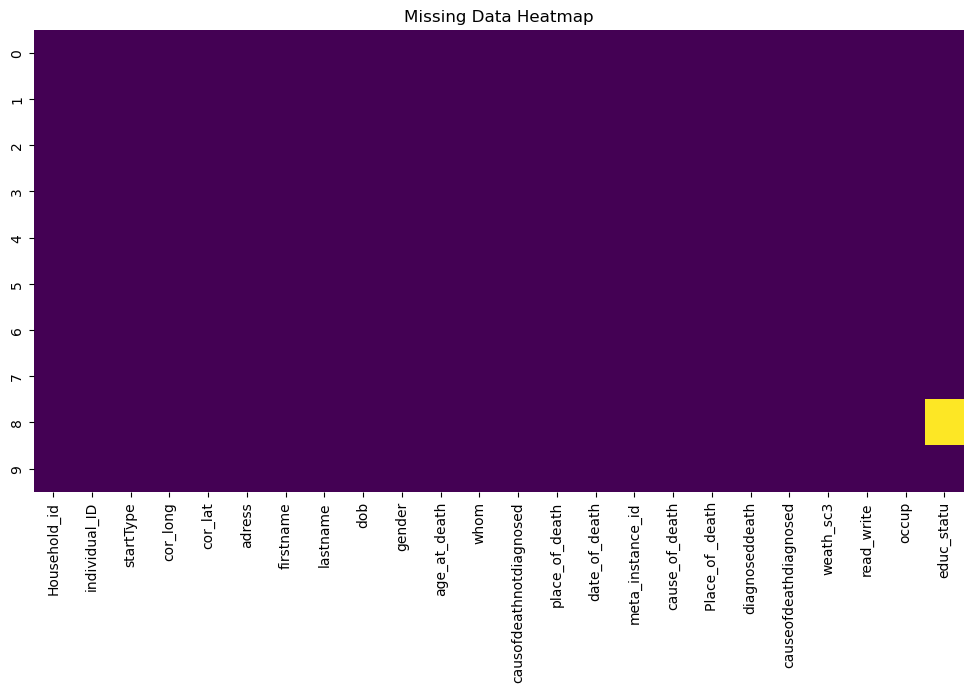


Outliers detected using Z-score (threshold > 3):
age_at_death    0
dtype: int64


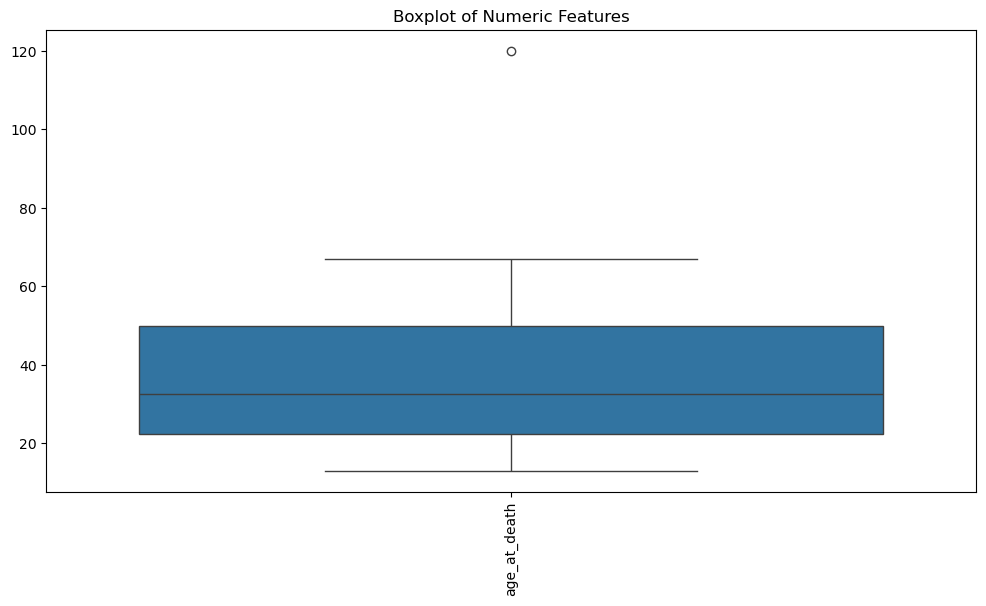


Outliers detected using IQR:
age_at_death    1
dtype: int64

Inconsistencies Detected (negative values in columns):

Number of duplicate records detected: 0

Anomalies detected by Isolation Forest:
is_anomaly
False    9
True     1
Name: count, dtype: int64


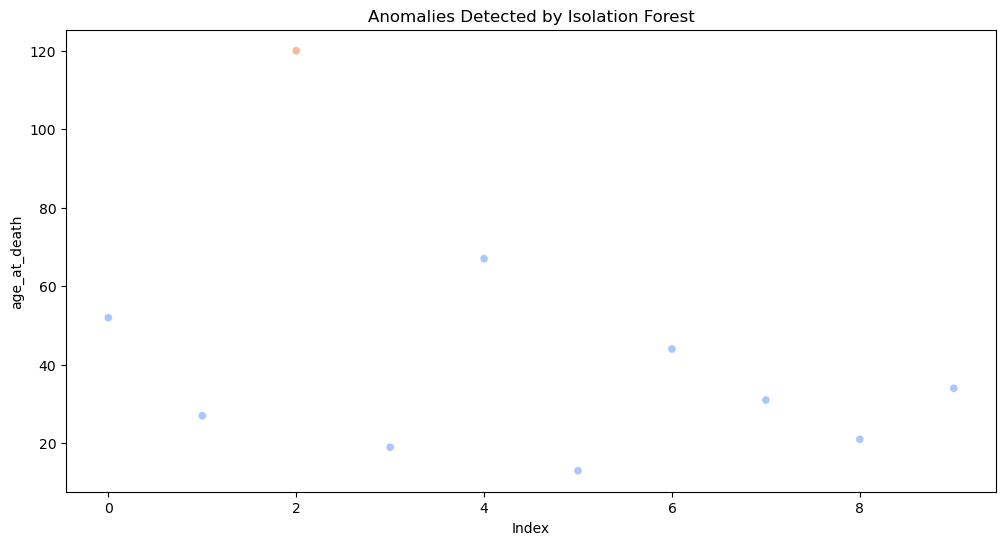


Columns with unusual names: ['Place_of _death']

Data types:
Household_id               object
individual_ID              object
startType                  object
cor_long                   object
cor_lat                    object
adress                     object
firstname                  object
lastname                   object
dob                        object
gender                     object
age_at_death                int64
whom                       object
causofdeathnotdiagnosed    object
place_of_death             object
date_of_death              object
meta_instance_id           object
cause_of_death             object
Place_of _death            object
diagnoseddeath             object
causeofdeathdiagnosed      object
weath_sc3                  object
read_write                 object
occup                      object
educ_statu                 object
is_anomaly                   bool
dtype: object


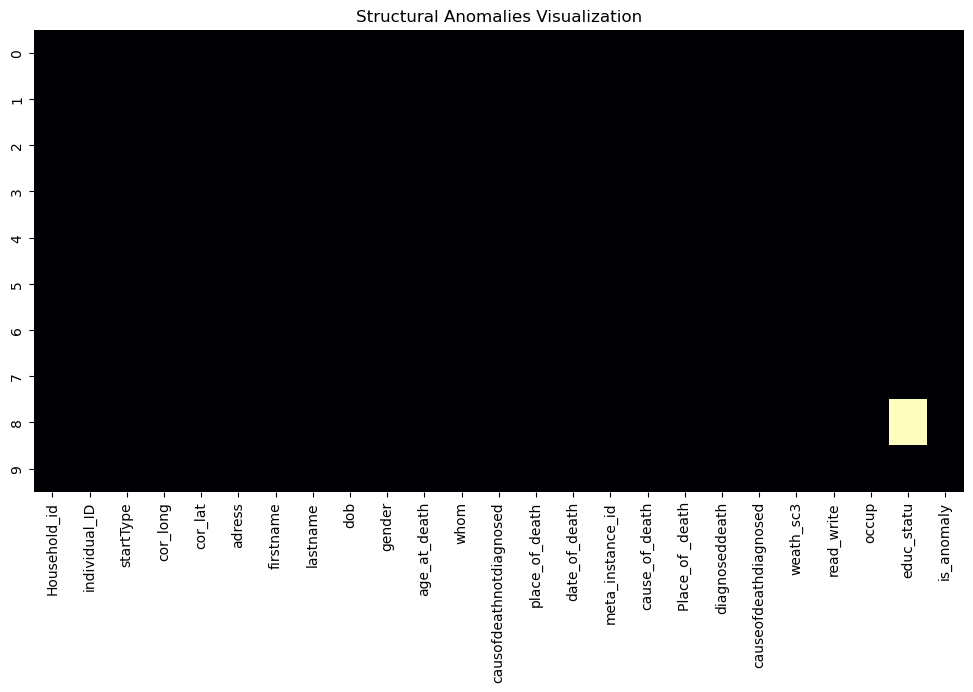


Anomalies saved to detected_anomalies.csv


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy import stats
import re

# Step 1: Load dataset
file_path = 'C:/Users/mihre/OneDrive/Documents/Ahri/Hackaton/sample_hackathon.csv'
df = pd.read_csv(file_path)

# Step 2: Visualize missing data
def visualize_missing_data(df):
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
    print("\nMissing Data Information:")
    print(missing_info[missing_info['Missing Values'] > 0])
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Data Heatmap")
    plt.show()

# Step 3: Detect and visualize outliers
def detect_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    if len(numeric_columns) == 0:
        print("\nNo numeric columns to check for outliers.")
        return

    z_scores = np.abs(stats.zscore(df[numeric_columns]))
    outliers_z = (z_scores > 3).sum(axis=0)
    print("\nOutliers detected using Z-score (threshold > 3):")
    print(outliers_z)

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[numeric_columns])
    plt.title("Boxplot of Numeric Features")
    plt.xticks(rotation=90)
    plt.show()

    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
    print("\nOutliers detected using IQR:")
    print(outliers_iqr)

# Step 4: Detect inconsistencies
def detect_inconsistencies(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    inconsistent_values = {}

    for col in numeric_columns:
        if df[col].min() < 0:
            inconsistent_values[col] = df[df[col] < 0]

    print("\nInconsistencies Detected (negative values in columns):")
    for col, rows in inconsistent_values.items():
        print(f"{col} contains negative values in {len(rows)} rows.")

    if inconsistent_values:
        plt.figure(figsize=(12, 6))
        sns.heatmap(df[numeric_columns].lt(0), cbar=False, cmap='coolwarm')
        plt.title("Negative Value Visualization")
        plt.show()

# Step 5: Detect duplicates
def detect_duplicates(df):
    duplicate_records = df[df.duplicated()]
    print("\nNumber of duplicate records detected:", len(duplicate_records))

    if not duplicate_records.empty:
        plt.figure(figsize=(12, 6))
        sns.heatmap(duplicate_records.isnull(), cbar=False, cmap='Blues')
        plt.title("Duplicate Records Heatmap")
        plt.show()

# Step 6: Anomaly detection using Isolation Forest
def detect_anomalies_using_ml(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    if len(numeric_columns) == 0:
        print("\nNo numeric columns for anomaly detection.")
        return

    df_scaled = StandardScaler().fit_transform(df[numeric_columns])
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    anomalies = iso_forest.fit_predict(df_scaled)
    df['is_anomaly'] = anomalies == -1

    print("\nAnomalies detected by Isolation Forest:")
    print(df['is_anomaly'].value_counts())

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df.index, y=df[numeric_columns[0]], hue=df['is_anomaly'], palette='coolwarm', legend=False)
    plt.title("Anomalies Detected by Isolation Forest")
    plt.xlabel("Index")
    plt.ylabel(numeric_columns[0])
    plt.show()

# Step 7: Class imbalance check
# Step 7: Generalized class imbalance check for all categorical or discrete columns
def detect_data_imbalance(df, threshold=0.9):
    print("\nClass Imbalance Report for Categorical and Discrete Columns:")
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    discrete_numeric_columns = [col for col in df.select_dtypes(include=[np.number]).columns if df[col].nunique() <= 10]
    columns_to_check = categorical_columns + discrete_numeric_columns

    if not columns_to_check:
        print("No categorical or discrete numeric columns to analyze.")
        return

    for col in columns_to_check:
        class_distribution = df[col].value_counts(normalize=True)
        print(f"\nColumn: '{col}'")
        print(class_distribution)

        # Check for imbalance if one class dominates
        if class_distribution.max() > threshold:
            print("⚠️  Imbalance detected: One class dominates the column.")

        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=df)
        plt.title(f"Class Distribution for Column: {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Step 8: Save anomalies
def save_anomalies(df, output_file='detected_anomalies.csv'):
    if 'is_anomaly' in df.columns:
        df[df['is_anomaly']].to_csv(output_file, index=False)
        print(f"\nAnomalies saved to {output_file}")
    else:
        print("\nNo anomalies to save (run Isolation Forest first).")

# Step 9: Structural anomaly detection
def detect_structural_anomalies(df):
    pattern = re.compile(r'^[\w\d_]+$')  # match col names with letters, digits, underscore
    invalid_columns = [col for col in df.columns if not pattern.match(col)]

    if invalid_columns:
        print("\nColumns with unusual names:", invalid_columns)

    print("\nData types:")
    print(df.dtypes)

    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='magma')
    plt.title("Structural Anomalies Visualization")
    plt.show()

# Main execution
if __name__ == '__main__':
    visualize_missing_data(df)
    detect_outliers(df)
    detect_inconsistencies(df)
    detect_duplicates(df)
    detect_anomalies_using_ml(df)

    # Replace with actual target column if applicable
    target_column_name = 'target_column'
    if target_column_name in df.columns:
        detect_data_imbalance(df, target_column_name)

    detect_structural_anomalies(df)
    save_anomalies(df)



Missing Data (columns with missing values):
educ_statu    1
dtype: int64


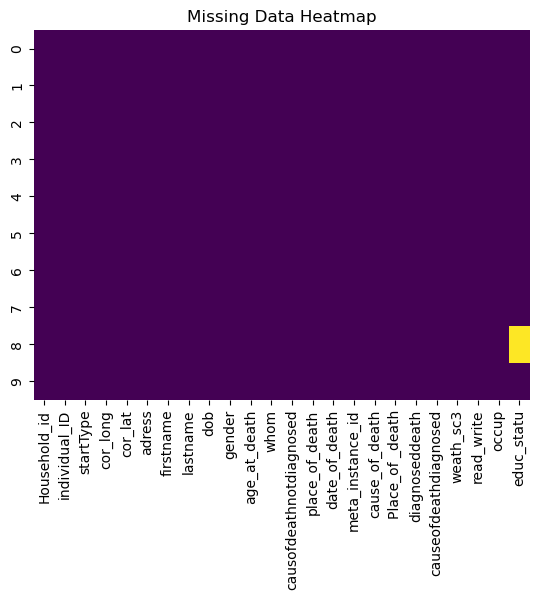


Z-score based outlier count per column (Z > 3):
age_at_death    0
dtype: int64

IQR based outlier count per column:
age_at_death    1
dtype: int64


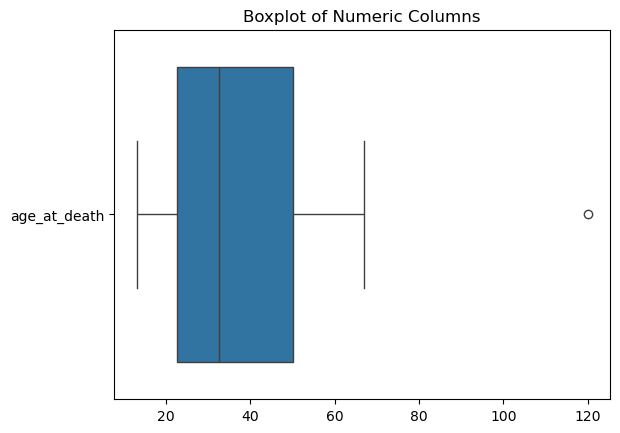

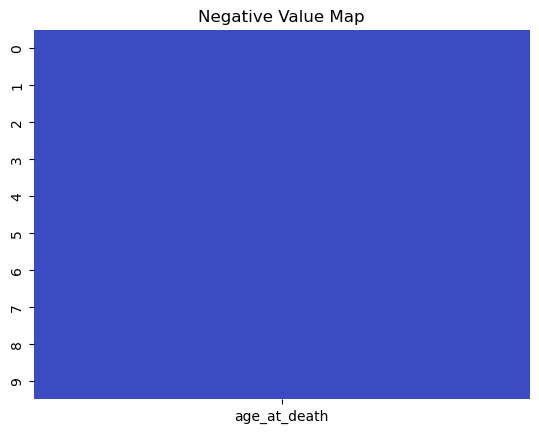


Duplicate rows detected: 0
⚠️ Structural Issues: Invalid column names found: ['Place_of _death']

Data Types:
Household_id               object
individual_ID              object
startType                  object
cor_long                   object
cor_lat                    object
adress                     object
firstname                  object
lastname                   object
dob                        object
gender                     object
age_at_death                int64
whom                       object
causofdeathnotdiagnosed    object
place_of_death             object
date_of_death              object
meta_instance_id           object
cause_of_death             object
Place_of _death            object
diagnoseddeath             object
causeofdeathdiagnosed      object
weath_sc3                  object
read_write                 object
occup                      object
educ_statu                 object
dtype: object


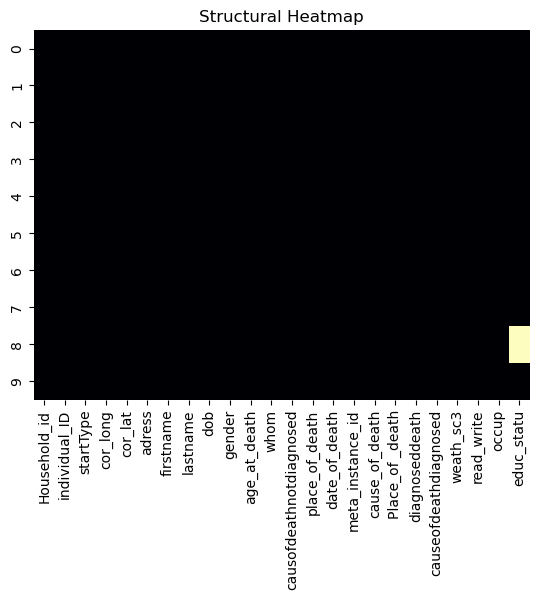


Isolation Forest Anomalies:
anomaly_ml
False    9
True     1
Name: count, dtype: int64


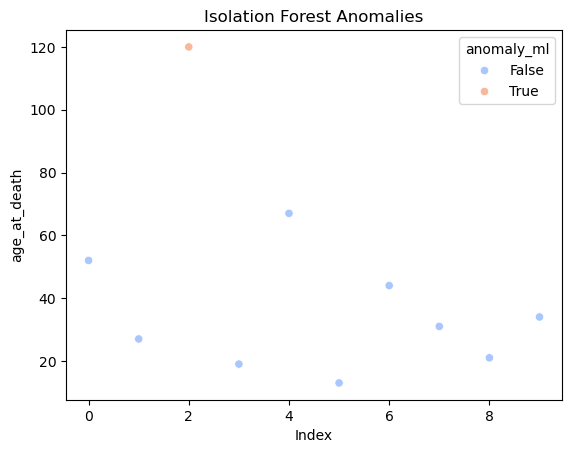


Anomalies saved to detected_anomalies.csv


In [34]:
# Required imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy import stats
import re

# Load dataset
file_path = 'C:/Users/mihre/OneDrive/Documents/Ahri/Hackaton/sample_hackathon.csv'
df = pd.read_csv(file_path)

# 1. Missing Data Detection
def visualize_missing_data(df):
    missing_data = df.isnull().sum()
    print("\nMissing Data (columns with missing values):")
    print(missing_data[missing_data > 0])
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Data Heatmap")
    plt.show()

# 2. Outlier Detection
def detect_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    z_scores = np.abs(stats.zscore(numeric_cols, nan_policy='omit'))
    print("\nZ-score based outlier count per column (Z > 3):")
    print((z_scores > 3).sum(axis=0))

    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
    print("\nIQR based outlier count per column:")
    print(outliers.sum())

    sns.boxplot(data=numeric_cols, orient='h')
    plt.title("Boxplot of Numeric Columns")
    plt.show()

# 3. Inconsistency Detection (e.g., negative values)
def detect_inconsistencies(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    for col in numeric_cols.columns:
        if (df[col] < 0).any():
            print(f"⚠️ Inconsistency: Column '{col}' contains negative values.")
    sns.heatmap(numeric_cols < 0, cbar=False, cmap='coolwarm')
    plt.title("Negative Value Map")
    plt.show()

# 4. Duplicate Detection
def detect_duplicates(df):
    dupes = df[df.duplicated()]
    print(f"\nDuplicate rows detected: {len(dupes)}")
    if not dupes.empty:
        sns.heatmap(dupes.isnull(), cbar=False, cmap='Blues')
        plt.title("Duplicate Rows Heatmap")
        plt.show()

# 5. Structural Anomalies (Column naming & type issues)
def detect_structural_anomalies(df):
    pattern = re.compile(r'^[\w\d_]+$')
    invalid_names = [col for col in df.columns if not pattern.match(col)]
    if invalid_names:
        print("⚠️ Structural Issues: Invalid column names found:", invalid_names)
    print("\nData Types:")
    print(df.dtypes)
    sns.heatmap(df.isnull(), cbar=False, cmap='magma')
    plt.title("Structural Heatmap")
    plt.show()

# 6. ML-based Anomaly Detection using Isolation Forest
def detect_anomalies_using_ml(df):
    numeric = df.select_dtypes(include=[np.number])
    if numeric.empty:
        print("No numeric data for Isolation Forest.")
        return
    scaled = StandardScaler().fit_transform(numeric)
    model = IsolationForest(contamination=0.1, random_state=42)
    df['anomaly_ml'] = model.fit_predict(scaled) == -1
    print("\nIsolation Forest Anomalies:")
    print(df['anomaly_ml'].value_counts())
    sns.scatterplot(x=df.index, y=numeric.iloc[:, 0], hue=df['anomaly_ml'], palette='coolwarm')
    plt.title("Isolation Forest Anomalies")
    plt.xlabel("Index")
    plt.ylabel(numeric.columns[0])
    plt.show()

# 7. Save ML anomalies
def save_anomalies(df, output_file='detected_anomalies.csv'):
    if 'anomaly_ml' in df.columns:
        df[df['anomaly_ml']].to_csv(output_file, index=False)
        print(f"\nAnomalies saved to {output_file}")
    else:
        print("\nRun ML anomaly detection first.")

# Execute all anomaly detection steps
visualize_missing_data(df)
detect_outliers(df)
detect_inconsistencies(df)
detect_duplicates(df)
detect_structural_anomalies(df)
detect_anomalies_using_ml(df)
save_anomalies(df)
